In [13]:
import requests
import json
import time
from wordcloud import WordCloud, STOPWORDS

In [2]:
api_key = REDACTED
api_username = REDACTED

In [3]:
start = 257389
install_count = 0

In [4]:
def get_topic_ids(page):
    endpoint = f"https://forum.image.sc/latest.json?page={page}"
    headers = {
        "Content-Type": "application/json",
        "Api-Key": api_key,
        "Api-Username": api_username,
    }
    response = requests.get(endpoint, headers=headers) 
    if response.status_code == 200:
        page_contents = response.json()
        return [x['id'] for x in page_contents["topic_list"]["topics"] if 'cellprofiler' in x["tags"]]
    else:
        print(f"Non 200 response code for page {page} (response code was {response.status_code}). Sleeping 10 seconds")
        time.sleep(10)
        return []
    

In [5]:
latest_topics = []
page = 1
while len(latest_topics)<=200:
    latest_topics += get_topic_ids(page)
    latest_topics = list(set(latest_topics))
    page += 1
    print(len(latest_topics))

1
1
2
3
3
3
6
6
6
9
10
14
18
22
24
25
27
29
30
31
33
35
36
37
37
38
39
41
43
44
46
46
49
51
56
60
63
63
64
64
67
68
69
70
75
80
87
87
90
96
99
101
102
103
104
105
108
108
109
112
Non 200 response code for page 61 (response code was 429). Sleeping 10 seconds
112
Non 200 response code for page 62 (response code was 429). Sleeping 10 seconds
112
Non 200 response code for page 63 (response code was 429). Sleeping 10 seconds
112
114
115
115
117
117
119
120
120
123
126
127
131
131
135
135
138
139
142
143
145
146
148
153
154
155
159
162
162
162
163
165
168
171
172
174
174
175
177
177
179
181
182
186
186
188
188
188
189
190
192
195
195
195
197
200
205


In [6]:
def get_all_post_text(topic):
    endpoint = f"https://forum.image.sc/t/{topic}.json"
    headers = {
        "Content-Type": "application/json",
        "Api-Key": api_key,
        "Api-Username": api_username,
    }
    response = requests.get(endpoint, headers=headers) 
    if response.status_code == 200:
        page_contents = response.json()
        return [x['cooked'] for x in page_contents["post_stream"]["posts"]]
    else:
        print(f"Non 200 response code for topic {topic} (response code was {response.status_code}). Sleeping 30 seconds")
        time.sleep(30)
        return False

In [7]:
topic_post_dict = {}
for eachtopic in latest_topics:
    all_posts = get_all_post_text(eachtopic)
    if all_posts:
        topic_post_dict[eachtopic]=all_posts

Non 200 response code for topic 18960 (response code was 429). Sleeping 30 seconds
Non 200 response code for topic 79534 (response code was 429). Sleeping 30 seconds
Non 200 response code for topic 75968 (response code was 429). Sleeping 30 seconds
Non 200 response code for topic 76099 (response code was 429). Sleeping 30 seconds
Non 200 response code for topic 75117 (response code was 429). Sleeping 30 seconds
Non 200 response code for topic 77262 (response code was 429). Sleeping 30 seconds
Non 200 response code for topic 74229 (response code was 429). Sleeping 30 seconds


In [8]:
with open("200ish_cellprofiler_forum_topics.json",'w') as topic_post_file:
    json.dump(topic_post_dict,topic_post_file)

In [10]:
topic_post_dict_flat = {k:' '.join(v) for k,v in topic_post_dict.items()}

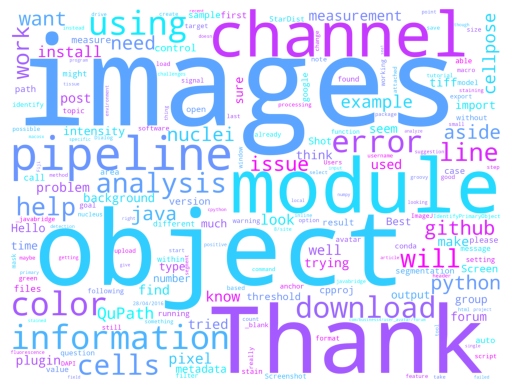

In [88]:
forum_stopwords = ["https","global","discourse","business4","uploads","div",
                   "class","svg","icon","span","class","svg","icon","use","href",
                  "image","br","cdn","li","height","width","file","hidden","lightbox",
                  "wrapper","data","optimized","code","jpeg","png","noopener","attachment",
                  "filename","strong","mention","blockquote","expand","srcset","aria",
                   "original","true","title","nofollow","short","base62","sha1",
                  "build","onebox","dominant","lazy","loading","80754af9","meta","quote",
                  "name","user","source","uploads/short","emoji","x86_64","lang"] #words related to file uploads, quotes, etc, not content
stopwords = ['cell','profiler','cellprofiler']

%matplotlib inline
import matplotlib.pyplot as plt
wc = WordCloud(background_color='white',colormap='cool',collocations=False,min_word_length=4,
               stopwords=list(STOPWORDS)+stopwords+forum_stopwords,regexp=r"\w[\w'\/]+",
               relative_scaling=1,width=2400,height=1800
              ).generate(' '.join(list(topic_post_dict_flat.values())))
plt.axis('off')
plt.imshow(wc)
plt.savefig('cellprofiler_post_usage.svg')

In [83]:
topic_count = 0
post_count = 0

for value in list(topic_post_dict.values()):
    topic_count +=1
    post_count += len(value)
print(f"{topic_count} topics, with {post_count} posts")
#install
print("install",len([x for x in list(topic_post_dict.values()) if "install" in " ".join(x).lower()]))
#plugin
print("plugin",len([x for x in list(topic_post_dict.values()) if "plugin" in " ".join(x).lower()]))
#install and plugin
print("install and plugin",len([x for x in list(topic_post_dict.values()) if "plugin" in " ".join(x).lower() if "install" in " ".join(x).lower()]))
#cellpose
print("cellpose",len([x for x in list(topic_post_dict.values()) if "cellpose" in " ".join(x).lower()]))
#install and cellpose
print("install and cellpose",len([x for x in list(topic_post_dict.values()) if "cellpose" in " ".join(x).lower() if "install" in " ".join(x).lower() ]))
#stardist
print("stardist",len([x for x in list(topic_post_dict.values()) if "stardist" in " ".join(x).lower()]))
#install and stardist
print("install and stardist",len([x for x in list(topic_post_dict.values()) if "stardist" in " ".join(x).lower() if "install" in " ".join(x).lower() ]))
#runimagej (macro)
print("runimagejmacro",len([x for x in list(topic_post_dict.values()) if "runimagejmacro" in " ".join(x).lower()]))
#runimagej (script)
print("runimagejscript",len([x for x in list(topic_post_dict.values()) if "runimagejscript" in " ".join(x).lower()]))
#imagej (no upload contamination)
print("imagej",len([x for x in list(topic_post_dict.values()) if " imagej " in " ".join(x).lower()]))  

198 topics, with 850 posts
install 29
plugin 35
install and plugin 16
cellpose 27
install and cellpose 11
stardist 11
install and stardist 6
runimagejmacro 2
runimagejscript 2
imagej 22
